<a href="https://colab.research.google.com/github/EPRADDH/NLP_Natural_Language_Processing_Methods/blob/main/Skip_Gram_Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skip-gram model

The Skip-gram model architecture usually tries to achieve the reverse of what the CBOW model does. It tries to predict the source context words (surrounding words) given a target word (the center word).

Considering our simple sentence from earlier,

“the quick brown fox jumps over the lazy dog”

#"Skip-gram is used to predict the context word for a given target word.the context words can be right side or left side of given word."

1. is used to find the nearest words in sequence

2. should be semantically or logically related words.



we feed our skip-gram model pairs of (X, Y) where X is our input and Y is our label. We do this by using [(target, context), 1] pairs as positive input samples where target is our word of interest and context is a context word occurring near the target word and the positive label 1 indicates this is a contextually relevant pair

We also feed in [(target, random), 0] pairs as negative input samples where target is again our word of interest but random is just a randomly selected word from our vocabulary which has no context or association with our target word. Hence the negative label 0indicates this is a contextually irrelevant pair

so model can  learn which pairs of words are contextually relevant and which are not .

and generate similar embeddings for semantically similar words.

Implementing the Skip-gram Model

1. Build the corpus vocabulary

2. Build a skip-gram [(target, context), relevancy] generator

3. Build the skip-gram model architecture

4. Train the Model

5. Get Word Embeddings



In [ ]:
import numpy as np
import gensim
#np.random.seed(13)
from keras.models import Sequential
from keras.layers import Dense, Embedding, Reshape
from IPython.display import SVG
from keras.utils import np_utils
from keras.utils.data_utils import get_file
from keras.preprocessing.text import Tokenizer
from keras.utils.vis_utils import model_to_dot
from gensim.models import Word2Vec
from gensim import models

In [ ]:
path = get_file('alice.txt', origin='http://www.gutenberg.org/files/11/11-0.txt')
corpus = open(path).readlines()[:300]

corpus = [sentence for sentence in corpus if sentence.count(" ") >= 2]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
corpus = tokenizer.texts_to_sequences(corpus)
nb_samples = sum(len(s) for s in corpus)
V = len(tokenizer.word_index) + 1
dim = 100
window_size = 2

In [ ]:
def generate_data(corpus, window_size, V):
    maxlen = window_size*2
    for words in corpus:
        L = len(words)
        for index, word in enumerate(words):
            s = index-window_size
            e = index+window_size+1
                    
            in_words = []
            labels = []
            for i in range(s, e):
                if i != index and 0 <= i < L:
                    in_words.append([word] )
                    labels.append(words[i])

            x = np.array(in_words,dtype=np.int32)
            y = np_utils.to_categorical(labels, V)
            yield (x, y)

In [ ]:
skipgram = Sequential()
skipgram.add(Embedding(input_dim=V, output_dim=dim, embeddings_initializer='glorot_uniform', input_length=1))
skipgram.add(Reshape((dim, )))
skipgram.add(Dense(V,activation='softmax'))
#SVG(model_to_dot(skipgram, show_shapes=True).create(prog='dot', format='svg'))

In [ ]:
skipgram.compile(loss='categorical_crossentropy', optimizer="adadelta")

In [ ]:
for ite in range(10):
    loss = 0.
    for x, y in generate_data(corpus, window_size, V):
        loss += skipgram.train_on_batch(x, y)

    print(ite, loss)

0 17508.31623983383
1 17504.92721414566
2 17501.543313503265
3 17498.162217617035
4 17494.78385782242
5 17491.40824842453
6 17488.035346984863
7 17484.66514635086
8 17481.29764509201
9 17477.932814598083


In [ ]:
f = open('vectors.txt' ,'w')
f.write(" ".join([str(V-1),str(dim)]))
f.write("\n")

1

In [ ]:
vectors = skipgram.get_weights()[0]
for word, i in tokenizer.word_index.items():
    f.write(word)
    f.write(" ")
    f.write(" ".join(map(str, list(vectors[i,:]))))
    f.write("\n")
f.close()

In [ ]:
w2v = gensim.models.KeyedVectors.load_word2vec_format('./vectors.txt', binary=False)

In [ ]:
w2v.most_similar(positive=['alice'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('way', 0.27920717000961304),
 ('find', 0.27284398674964905),
 ('sight', 0.26491814851760864),
 ('schoolroom', 0.25955334305763245),
 ('eat', 0.24656961858272552),
 ('speak', 0.2385406792163849),
 ('sending', 0.2375614047050476),
 ('shall', 0.23341995477676392),
 ('home', 0.22382879257202148),
 ('matter', 0.22074073553085327)]

#Build the corpus vocabulary
To start off, we will first build our corpus vocabulary where we extract out each unique word from our vocabulary and map a unique numeric identifier to it.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=open('/content/drive/MyDrive/NLP-Natural-Language-Processing-Methods/corona.txt','r',encoding='cp1252')
corona = [text for text in data if text.count(' ') >= 2]

In [ ]:
corona

['The speed of transmission is an important point of difference between the two viruses. Influenza has a shorter median incubation period (the time from infection to appearance of symptoms) and a shorter serial interval (the time between successive cases) than COVID-19 virus. The serial interval for COVID-19 virus is estimated to be 5-6 days, while for influenza virus, the serial interval is 3 days. This means that influenza can spread faster than COVID-19. \n',
 'Further, transmission in the first 3-5 days of illness, or potentially pre-symptomatic transmission –transmission of the virus before the appearance of symptoms – is a major driver of transmission for influenza. In contrast, while we are learning that there are people who can shed COVID-19 virus 24-48 hours prior to symptom onset, at present, this does not appear to be a major driver of transmission. \n',
 'The reproductive number – the number of secondary infections generated from one infected individual – is understood to b

In [ ]:
from keras.preprocessing import text

tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(corona)


In [ ]:
word2id = tokenizer.word_index
id2word = {v:k for k, v in word2id.items()}

In [ ]:
word2id

{'19': 5,
 '2': 37,
 '24': 72,
 '3': 29,
 '48': 73,
 '5': 19,
 '6': 52,
 'a': 11,
 'an': 39,
 'and': 12,
 'appear': 82,
 'appearance': 26,
 'are': 22,
 'at': 78,
 'be': 18,
 'before': 64,
 'between': 13,
 'both': 94,
 'can': 32,
 'cases': 50,
 'comparisons': 100,
 'context': 96,
 'contrast': 65,
 'covid': 4,
 'days': 20,
 'difference': 42,
 'difficult': 102,
 'direct': 99,
 'does': 80,
 'driver': 35,
 'estimated': 51,
 'estimates': 93,
 'faster': 55,
 'first': 57,
 'for': 7,
 'from': 25,
 'further': 56,
 'generated': 86,
 'has': 44,
 'higher': 91,
 'hours': 74,
 'however': 92,
 'illness': 58,
 'important': 40,
 'in': 33,
 'incubation': 46,
 'individual': 89,
 'infected': 88,
 'infection': 48,
 'infections': 85,
 'influenza': 3,
 'interval': 16,
 'is': 9,
 'learning': 67,
 'major': 34,
 'making': 98,
 'means': 53,
 'median': 45,
 'more': 101,
 'not': 81,
 'number': 36,
 'of': 2,
 'one': 87,
 'onset': 77,
 'or': 59,
 'people': 69,
 'period': 47,
 'point': 41,
 'potentially': 60,
 'pre': 

In [ ]:
id2word

{1: 'the',
 2: 'of',
 3: 'influenza',
 4: 'covid',
 5: '19',
 6: 'virus',
 7: 'for',
 8: 'transmission',
 9: 'is',
 10: 'to',
 11: 'a',
 12: 'and',
 13: 'between',
 14: 'time',
 15: 'serial',
 16: 'interval',
 17: 'than',
 18: 'be',
 19: '5',
 20: 'days',
 21: '–',
 22: 'are',
 23: 'viruses',
 24: 'shorter',
 25: 'from',
 26: 'appearance',
 27: 'symptoms',
 28: 'while',
 29: '3',
 30: 'this',
 31: 'that',
 32: 'can',
 33: 'in',
 34: 'major',
 35: 'driver',
 36: 'number',
 37: '2',
 38: 'speed',
 39: 'an',
 40: 'important',
 41: 'point',
 42: 'difference',
 43: 'two',
 44: 'has',
 45: 'median',
 46: 'incubation',
 47: 'period',
 48: 'infection',
 49: 'successive',
 50: 'cases',
 51: 'estimated',
 52: '6',
 53: 'means',
 54: 'spread',
 55: 'faster',
 56: 'further',
 57: 'first',
 58: 'illness',
 59: 'or',
 60: 'potentially',
 61: 'pre',
 62: 'symptomatic',
 63: '–transmission',
 64: 'before',
 65: 'contrast',
 66: 'we',
 67: 'learning',
 68: 'there',
 69: 'people',
 70: 'who',
 71: 'shed

In [ ]:
vocab_size = len(word2id) + 1 
embed_size = 100

In [ ]:
wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in corona]
print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])

Vocabulary Size: 103
Vocabulary Sample: [('the', 1), ('of', 2), ('influenza', 3), ('covid', 4), ('19', 5), ('virus', 6), ('for', 7), ('transmission', 8), ('is', 9), ('to', 10)]


# Build a skip-gram [(target, context), relevancy] generator

irrelevant = 0
relevant = 1

In [ ]:
from keras.preprocessing.sequence import skipgrams

# generate skip-grams
skip_grams = [skipgrams(wid, vocabulary_size=vocab_size, window_size=10) for wid in wids]

# view sample skip-grams
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(10):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          id2word[pairs[i][0]], pairs[i][0], 
          id2word[pairs[i][1]], pairs[i][1], 
          labels[i]))

(interval (16), shed (71)) -> 0
(time (14), than (17)) -> 1
(the (1), symptoms (27)) -> 1
(means (53), 19 (5)) -> 1
(median (45), the (1)) -> 1
(symptoms (27), shorter (24)) -> 1
(a (11), the (1)) -> 1
(covid (4), very (95)) -> 0
(than (17), means (53)) -> 1
(interval (16), shed (71)) -> 0


#Build the skip-gram model architecture

To build our deep learning architecture for the skip-gram model.our inputs will be our target word and context or random word pair

which are passed to an embedding layer to initialized with random weights of it’s own.Once we obtain the word embeddings for the target and the context word

we pass it to a merge layer where we compute the dot product of these two vectors. 

Then we pass on this dot product value to a dense sigmoid layer which predicts either a 1 or a 0 depending on if the pair of words are contextually relevant or just random words (Y’)

We match this with the actual relevance label (Y), compute the loss by leveraging the mean_squared_error loss and perform backpropagation with each epoch to update the embedding layer in the process

In [ ]:
from keras.layers import dot
from keras.layers import Dense, Input
from keras.layers.core import Reshape
from keras.layers import Embedding
from keras.models import  Model
from keras.backend import reshape

# build skip-gram architecture
inp = Input(shape=(1,),name = "first_input")
word_model22 = Embedding(input_dim=vocab_size, output_dim=embed_size,
                         embeddings_initializer="glorot_uniform",
                         input_length=1)
emb  = word_model22(inp)
word_model22 = Reshape(target_shape= (embed_size,))(emb)

inp1 = Input(shape=(1,),name = "2nd_input")
context_model = Embedding(input_dim=vocab_size, output_dim=embed_size,
                         embeddings_initializer="glorot_uniform",
                         input_length=1)
emb1  = context_model(inp1)
context_model = Reshape(target_shape= (embed_size,))(emb1)

mo = (dot([word_model22, context_model],axes=-1))
mo = (Dense(1, kernel_initializer="glorot_uniform", activation="sigmoid"))(mo)
model = Model(inputs = (inp, inp1), outputs =mo)
model.compile(loss="mean_squared_error", optimizer="rmsprop")

# view model summary
print(model.summary())

# visualize model structure
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))

NameError: ignored

In [ ]:
from keras.layers import Input
from keras.models import Model
from keras.layers.embeddings import Embedding
from keras.layers.core import Dense, Reshape
from keras.layers import dot

input_target = Input((1,))
input_context = Input((1,))

embedding = Embedding(vocab_size, embed_size, input_length=1, name='embedding')

word_embedding = embedding(input_target)
word_embedding = Reshape((embed_size, 1))(word_embedding)
context_embedding = embedding(input_context)
context_embedding = Reshape((embed_size, 1))(context_embedding)

# now perform the dot product operation  
dot_product = dot([word_embedding, context_embedding], axes=1)
dot_product = Reshape((1,))(dot_product)

# add the sigmoid output layer
output = Dense(1, activation='sigmoid')(dot_product)

model = Model([input_target, input_context],output)
model.compile(loss='mean_squared_error', optimizer='rmsprop')

In [ ]:
# view model summary
print(model.summary())

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 100)       10300       input_7[0][0]                    
                                                                 input_8[0][0]                    
__________________________________________________________________________________________________
reshape_45 (Reshape)            (None, 100, 1)       0           embedding[2][0]       

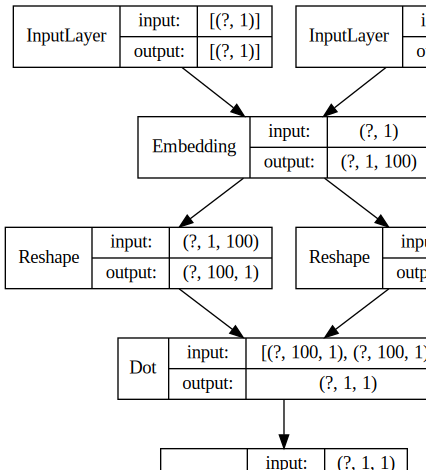

In [ ]:
# visualize model structure
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))

In [ ]:
import numpy as np

for epoch in range(1, 6):
    loss = 0
    for i, elem in enumerate(skip_grams):
        pair_first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        pair_second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [pair_first_elem, pair_second_elem]
        Y = labels
        if i % 10000 == 0:
            #print('Processed {} (skip_first, skip_second, relevance) pairs'.format(i))
            loss += model.train_on_batch(X,Y)  

    print('Epoch:', epoch, 'Loss:', loss)

Epoch: 1 Loss: 0.24751104414463043
Epoch: 2 Loss: 0.2471613585948944
Epoch: 3 Loss: 0.2468196153640747
Epoch: 4 Loss: 0.24647873640060425
Epoch: 5 Loss: 0.24613448977470398


# Skipgram word2Vec_model using tensorflow

In [ ]:
import numpy as np
import tensorflow as tf
import string
import nltk
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:

data_file = "/content/drive/MyDrive/NLP-Natural-Language-Processing-Methods/THE _AVENGERS.txt"
f = open(data_file, "r",encoding='cp1252')
raw_data = f.read()
raw_data = raw_data[:50000]

# Cleaning data

In [ ]:
def clean_text(text):
    text = text.lower()


    text =  text.replace("\n", "")
    text = text.replace("\xad", "")
    text = text.replace("'ve", " have")
    text = text.replace("'t", " not")
    text = text.replace("'s", " is")
    text = text.replace("'m", " am")

    ## Specific Words
    text = text.replace("p.e.g.a.s.u.s", "pegasus")
    text = text.replace("s.h.i.e.l.d.", "shield")
    text = text.replace("s.h.i.e.l.d", "shield")
    text = text.replace("(v.o.)", "(vo)")
    text = text.replace("dr.", "dr")
    text = text.replace("...", "")
    text = text.replace("'", "")
    text = text.replace('"', "")

    ## Numbers with Word
    text = text.replace("0", " zero ")
    text = text.replace("1", " one ")
    text = text.replace("2", " two ")
    text = text.replace("3", " three ")
    text = text.replace("4", " four ")
    text = text.replace("5", " five ")
    text = text.replace("6", " six ")
    text = text.replace("7", " seven ")
    text = text.replace("8", " eight ")
    text = text.replace("9", " nine ")

    punc = set(string.punctuation)
    for p in punc:
        if p != ".":
            #text = text.replace(p, " " + p + " ")
            text = text.replace(p, " ")

    text = " ".join(text.split())

    return text

In [ ]:
data = clean_text(raw_data)

data

'skip to contentsearch or jump to…pull requestsissuesmarketplaceexplore epraddh nikhilroxtomar word two vec one two zero codeissuespull requestsactionsprojectswikisecurityinsightsword two vec avengers two zero one two .txt nikhilroxtomarnikhilroxtomar add files via uploadlatest commit seven five five six b two a on feb nine two zero one nine history one contributor five nine three two lines four three seven nine sloc one nine two kb the avengers written by joss whedon and there came a day a day unlike any other when earth is mightiest heroes and heroines found themselves united against a common threat. on that day the avengers were born to fight the foes no single superhero could withstand through the years their roster has prospered changing many times but their glory has never been denied heed the call then for now the avengers assemble burning blue flames. a smoky cube shape emerges the tesseract. filling the screen with blackness. cut to ext. throne room space night kneeling behind

# Spliting data into lines

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
split_data = []

stopwords = nltk.corpus.stopwords.words("english")

for lines in data.split("."):
    tmp_line = []
    for word in lines.strip().split(" "):
        if word not in stopwords:
            if len(word) > 0:
                tmp_line.append(word)
    if len(tmp_line) > 0:
        split_data.append(tmp_line)

In [ ]:
split_data[1]

['txt',
 'nikhilroxtomarnikhilroxtomar',
 'add',
 'files',
 'via',
 'uploadlatest',
 'commit',
 'seven',
 'five',
 'five',
 'six',
 'b',
 'two',
 'feb',
 'nine',
 'two',
 'zero',
 'one',
 'nine',
 'history',
 'one',
 'contributor',
 'five',
 'nine',
 'three',
 'two',
 'lines',
 'four',
 'three',
 'seven',
 'nine',
 'sloc',
 'one',
 'nine',
 'two',
 'kb',
 'avengers',
 'written',
 'joss',
 'whedon',
 'came',
 'day',
 'day',
 'unlike',
 'earth',
 'mightiest',
 'heroes',
 'heroines',
 'found',
 'united',
 'common',
 'threat']

# Preparing dictionary

In [ ]:
def prepare_dictionary(data):
    idx = 0
    word2idx = {}
    idx2word = {}

    for line in data:
        for word in line:
            if word not in word2idx.keys():
                word2idx[word] = idx
                idx2word[idx] = word
                idx += 1
    vocab_size = len(word2idx.keys())
    return vocab_size, word2idx, idx2word

In [ ]:

vocab_size, word2idx, idx2word = prepare_dictionary(split_data)
print("Vocab Size: ", vocab_size ) 

Vocab Size:  1343


# Preparing dataset

In [ ]:
def prepare_dataset(data, word2idx, vocab_size, window=5):
    X = []
    Y = []

    for line in data:
        fn = window//2
        line_len = len(line)

        if line_len > window:
            for i in range(line_len):
                a = line[i]
                b = []
                for j in range(window):
                    idx = i+j-fn
                    if (idx != i) and (idx >= 0 and idx < line_len):
                        x = word2idx[line[i]]
                        y = word2idx[line[idx]]

                        X.append(x)
                        Y.append(y)
    X = np.array(X)
    Y = np.array(Y)
    return X, Y

In [ ]:
X, Y = prepare_dataset(split_data, word2idx, vocab_size)

In [ ]:

print(split_data[0])

for i in range(10):
    print("{:20s} - {:20s}".format(idx2word[X[i]], idx2word[Y[i]]))

['skip', 'contentsearch', 'jump', 'to…pull', 'requestsissuesmarketplaceexplore', 'epraddh', 'nikhilroxtomar', 'word', 'two', 'vec', 'one', 'two', 'zero', 'codeissuespull', 'requestsactionsprojectswikisecurityinsightsword', 'two', 'vec', 'avengers', 'two', 'zero', 'one', 'two']
skip                 - contentsearch       
skip                 - jump                
contentsearch        - skip                
contentsearch        - jump                
contentsearch        - to…pull             
jump                 - skip                
jump                 - contentsearch       
jump                 - to…pull             
jump                 - requestsissuesmarketplaceexplore
to…pull              - contentsearch       


# Onehot Encoding

In [ ]:
def onehot_encoding(x, y):
    X = tf.one_hot(x, vocab_size)
    Y = tf.one_hot(y, vocab_size)
    return X, Y

# Generate dataset batches

In [ ]:
def batch_dataset(x, y, batch_size=1024, prefetch=2):
    dataset = tf.data.Dataset.from_tensor_slices((x, y))
    dataset = dataset.map(onehot_encoding)
    dataset = dataset.batch(batch_size)
    dataset = tf.data.Dataset.prefetch(dataset,2)
    #itr = tf.compat.v1.data.make_initializable_iterator(dataset)
    for element in dataset:
      return  element

In [ ]:
itr,data = batch_dataset(X, Y)

In [ ]:
from tensorflow.python.framework.ops import disable_eager_execution

disable_eager_execution()

#x_inputs = tf.placeholder(tf.float32, shape=[None, vocab_size])
x_inputs = tf.compat.v1.placeholder(shape=[None, vocab_size], dtype=tf.float32)
#y_labels = tf.placeholder(tf.float32, shape=[None, vocab_size])
y_labels = tf.compat.v1.placeholder(shape=[None, vocab_size], dtype=tf.float32)

#global_step = tf.train.create_global_step()

embed_dim = 32

# hidden layer: which represents word vector eventually
W1 = tf.Variable(tf.random.normal([vocab_size, embed_dim]))
b1 = tf.Variable(tf.random.normal([embed_dim])) #bias
hidden_representation = tf.add(tf.matmul(x_inputs,W1), b1)

# output layer
W2 = tf.Variable(tf.random.normal([embed_dim, vocab_size]))
b2 = tf.Variable(tf.random.normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_labels * tf.math.log(prediction), axis=[1]))

# training operation
#train_op = tf.optimizers.Adam().minimize(loss,var_list=[W2,b2])

In [ ]:
sess = tf.compat.v1.Session()
init = tf.compat.v1.global_variables_initializer()
sess.run(init) #make sure you do this!
# define the loss function:
cross_entropy_loss = tf.math.reduce_mean(-tf.reduce_sum(y_labels * tf.math.log(prediction),axis=[1] ))
# define the training step:
train_step = tf.optimizers.SGD(0.1).minimize(cross_entropy_loss,var_list=(W2,b2 ))
n_iters = 10000
# train for n_iter iterations
for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

TypeError: ignored

In [ ]:
# https://github.com/nikhilroxtomar/Word2vec/blob/master/Skip_Gram_Word2Vec.ipynb